## CSCI 8361 Lab 1: Synopsis of the Study on Kapler Light Curves Classification

[Dataset: KeplerLightCurves](https://www.timeseriesclassification.com/description.php?Dataset=KeplerLightCurves)

Install and Import

In [663]:
!pip install -U aeon

In [664]:
from aeon.datasets import load_from_ts_file
import matplotlib.pyplot as plt
import numpy as np

Access Datasets

In [665]:
#from google.colab import files
#uploaded = files.upload()  # Opens a file upload dialog

In [666]:
file_path1 = "/content//KeplerLightCurves_TRAIN.ts"
kepler_TEST = load_from_ts_file(file_path1)

file_path2 = "/content//KeplerLightCurves_TEST.ts"
kepler_TRAIN = load_from_ts_file(file_path2)

Verify the Data

In [667]:
# Train Data
print(kepler_TRAIN[0].shape)
print(kepler_TRAIN[1].shape)

print(len(kepler_TRAIN[0]))
print(len(kepler_TRAIN))

(399, 1, 4767)
(399,)
399
2


In [668]:
# Test Data
print(kepler_TEST[0].shape)
print(kepler_TEST[1].shape)

print(len(kepler_TEST[0]))
print(len(kepler_TEST))

(920, 1, 4767)
(920,)
920
2


In [669]:
kepler_TRAIN_x=kepler_TRAIN[0]
kepler_TRAIN_lables=kepler_TRAIN[1]

kepler_TEST_x=kepler_TEST[0]
kepler_TEST_lables=kepler_TEST[1]

In [670]:
#print(kepler_TEST_lables)

**Here we can numerically visualize the 7 classes:**

1.   δ Scuti stars
2.   γ Doradus stars
3.  RR Lyrae stars
4.  Rotational variables
5.  Contact eclipsing binaries
6.  Detached eclipsing binaries
7.  Non-variable stars



In [671]:
w = np.array(kepler_TRAIN_lables)
y = np.array(kepler_TEST_lables)
print("Original kepler_TRAIN Labels:", np.unique(w))
print("Original kepler_TEST Labels:", np.unique(y))

Original kepler_TRAIN Labels: ['1' '2' '3' '4' '5' '6' '7']
Original kepler_TEST Labels: ['1' '2' '3' '4' '5' '6' '7']


In [672]:
# kepler_TRAIN
unique_labels1, counts1 = np.unique(w, return_counts=True)
for label1, count1 in zip(unique_labels1, counts1):
    print(f"Label '{label1}' appears {count1} times.")

Label '1' appears 52 times.
Label '2' appears 25 times.
Label '3' appears 124 times.
Label '4' appears 79 times.
Label '5' appears 61 times.
Label '6' appears 50 times.
Label '7' appears 8 times.


In [673]:
# kepler_TEST
unique_labels, counts = np.unique(y, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Label '{label}' appears {count} times.")

Label '1' appears 119 times.
Label '2' appears 58 times.
Label '3' appears 287 times.
Label '4' appears 183 times.
Label '5' appears 140 times.
Label '6' appears 116 times.
Label '7' appears 17 times.


In [674]:

#I observed class 1, 2, 3, 4, I have gotten class 2, 3, 4 right so far
label_mapping = {
    "1": "Contact Eclipsing Binary", "2": "*Detached Eclipsing Binary", "3": "*Scuti Star", "4": "*Doradus Star",
    "5": "Non-variable Star", "6": "Rational Variable", "7": "*RR Lyrae Star"
}

w_new = np.vectorize(label_mapping.get)(w)
y_new = np.vectorize(label_mapping.get)(y)
#print("Renamed kepler_TRAIN Labels:", np.unique(w_new))
#print("Renamed kepler_TEST Labels:", np.unique(y_new))

Instances

Text(0, 0.5, 'Long-cadence Photometry')

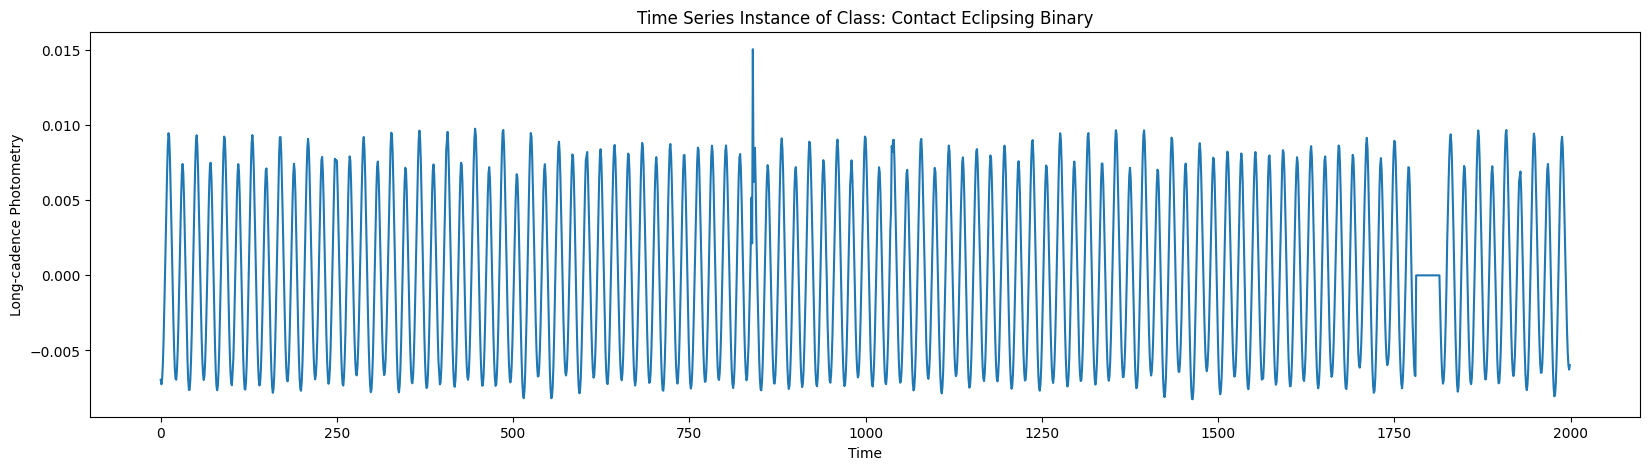

In [675]:
plt.figure(figsize=(20,5))
plt.plot(kepler_TEST_x[0,0,:2000])
plt.title(f"Time Series Instance of Class: {y_new[0]}")
plt.xlabel("Time")
plt.ylabel("Long-cadence Photometry")

Text(0, 0.5, 'Long-cadence Photometry')

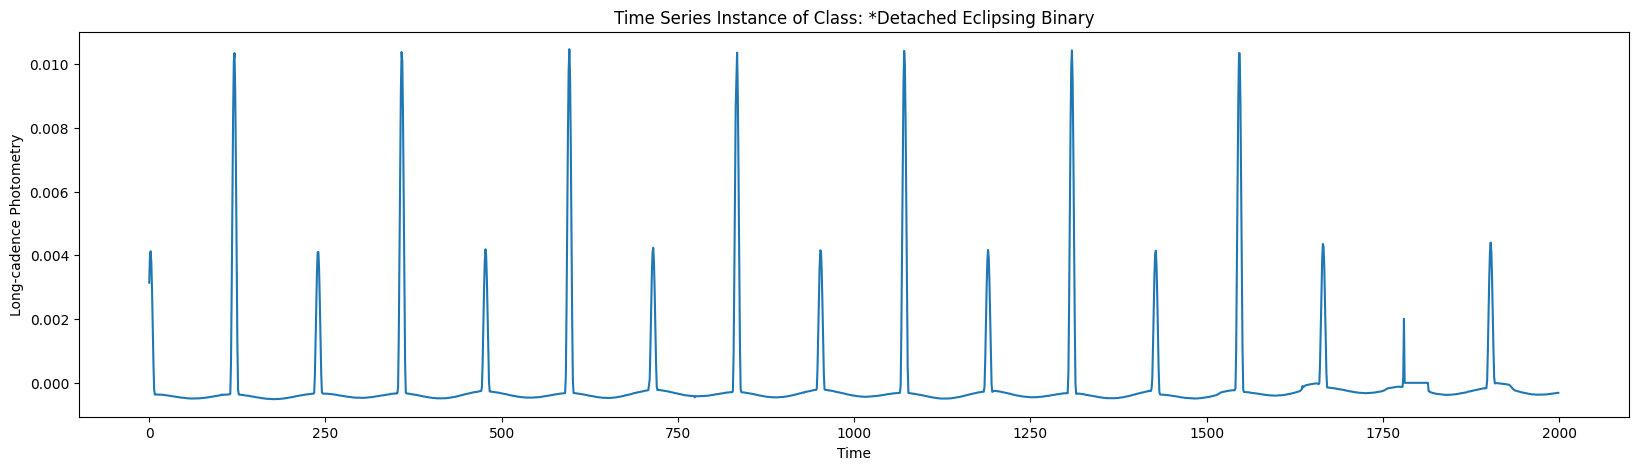

In [676]:
#Correct Guess based on single plot observation
plt.figure(figsize=(20,5))
plt.plot(kepler_TEST_x[160,0,:2000])
plt.title(f"Time Series Instance of Class: {y_new[160]}")
plt.xlabel("Time")
plt.ylabel("Long-cadence Photometry")

Text(0, 0.5, 'Long-cadence Photometry')

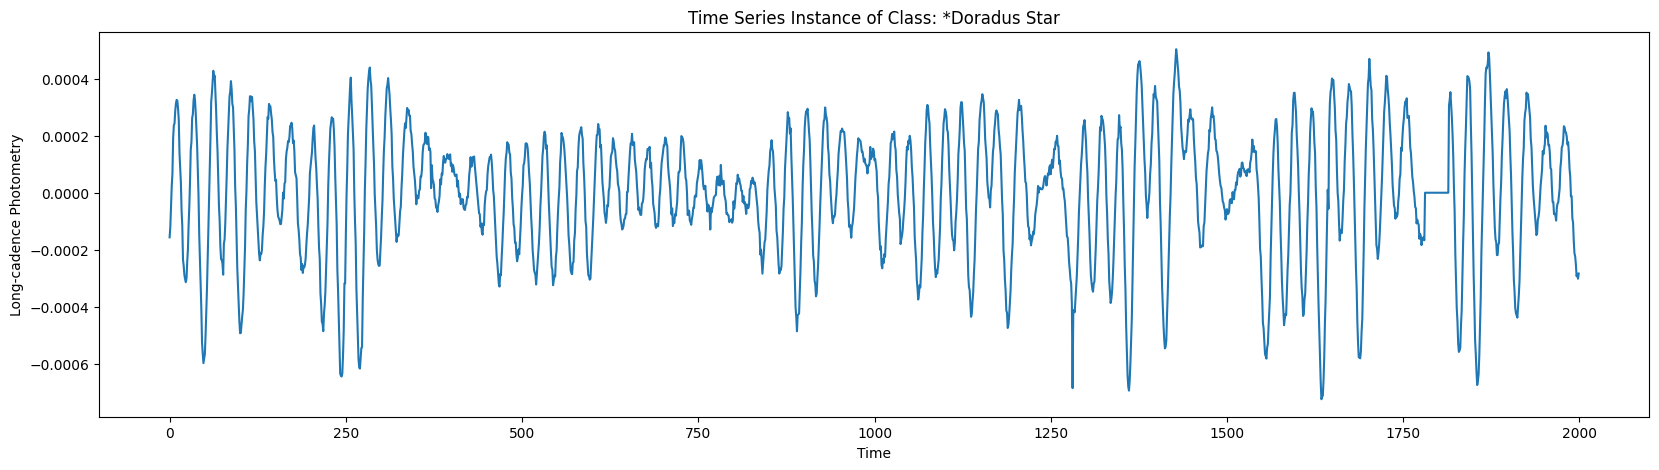

In [677]:
plt.figure(figsize=(20,5))
plt.plot(kepler_TEST_x[500,0,:2000])
plt.title(f"Time Series Instance of Class: {y_new[500]}")
plt.xlabel("Time")
plt.ylabel("Long-cadence Photometry")

Text(0, 0.5, 'Long-cadence Photometry')

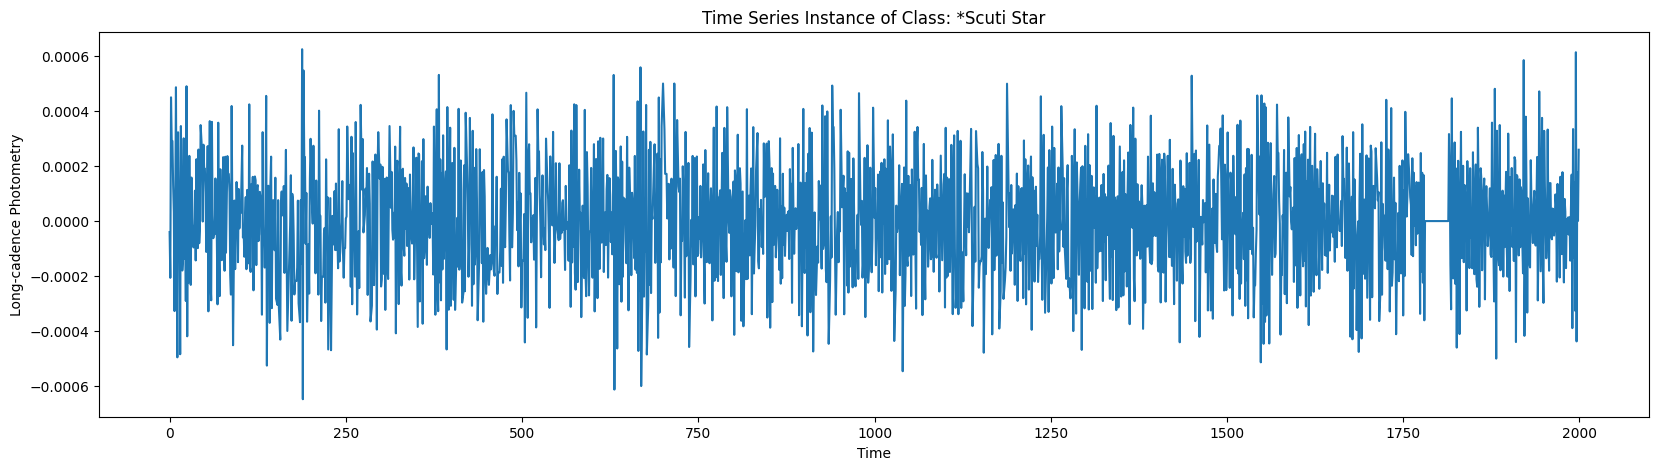

In [678]:
#Correct Guess based on single plot observation
plt.figure(figsize=(20,5))
plt.plot(kepler_TEST_x[280,0,:2000])
plt.title(f"Time Series Instance of Class: {y_new[280]}")
plt.xlabel("Time")
plt.ylabel("Long-cadence Photometry")

Text(0, 0.5, 'Long-cadence Photometry')

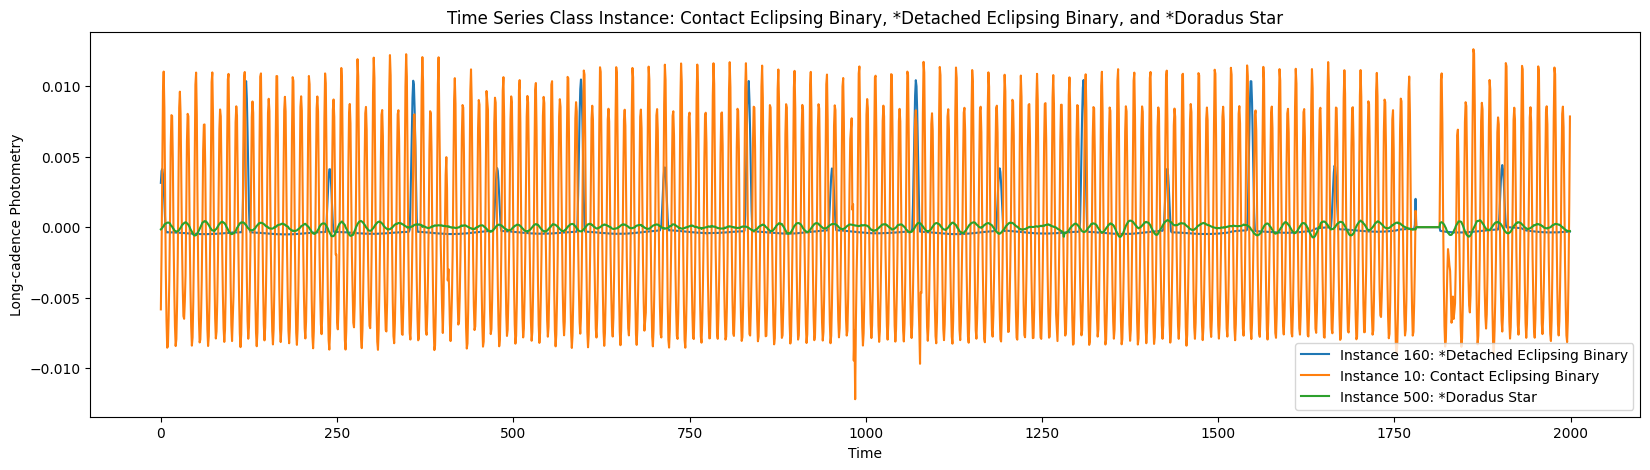

In [679]:
#Correct Guess for 4 and 2 based on comparison plot (Contact EB's fluctuations are larger than mostly all; you also see the classic pattern of a doradus star)
plt.figure(figsize=(20,5))
plt.plot(kepler_TEST_x[160,0,:2000], label=f"Instance 160: {y_new[160]}")
plt.plot(kepler_TEST_x[10,0,:2000], label=f"Instance 10: {y_new[10]}")
plt.plot(kepler_TEST_x[500,0,:2000], label=f"Instance 500: {y_new[500]}")
plt.legend()
plt.title(f"Time Series Class Instance: {y_new[10]}, {y_new[160]}, and {y_new[500]}")
plt.xlabel("Time")
plt.ylabel("Long-cadence Photometry")

Text(0, 0.5, 'Long-cadence Photometry')

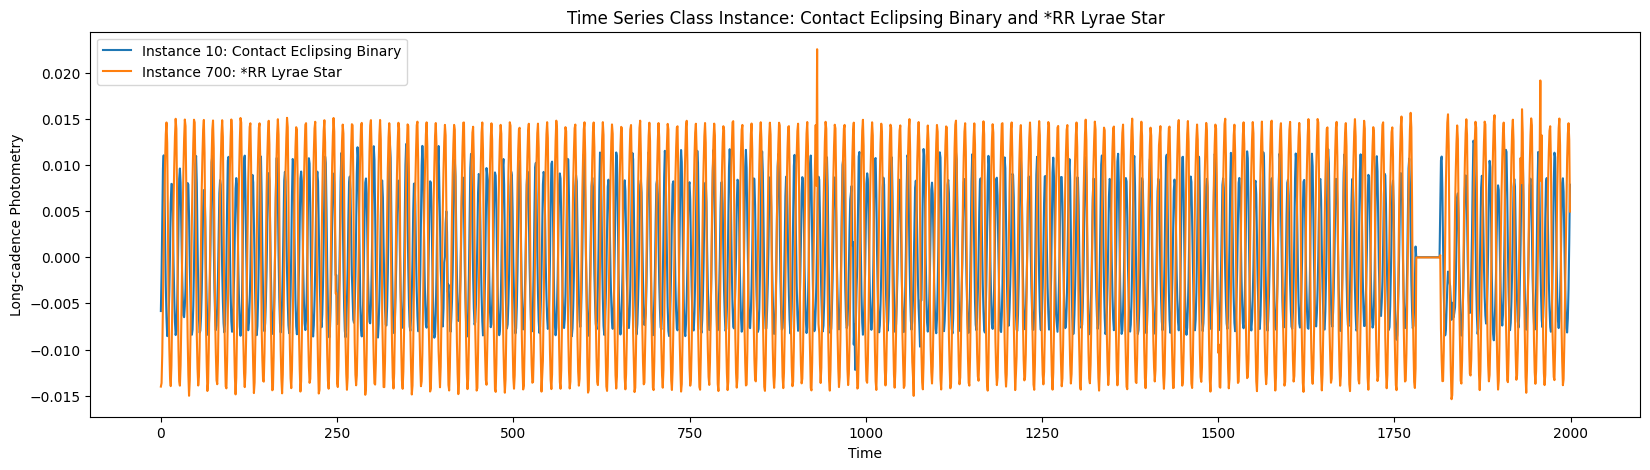

In [680]:
#In this comparison plot, you can see the classification characteristics of the RR Lyrae Star more clearly (class 1 vs class 7).
plt.figure(figsize=(20,5))
plt.plot(kepler_TEST_x[10,0,:2000], label=f"Instance 10: {y_new[10]}")
#plt.plot(kepler_TEST_x[160,0,:2000], label=f"Instance 160: {y_new[160]}")
#plt.plot(kepler_TEST_x[200,0,:2000], label=f"Instance 200: {y_new[200]}")
#plt.plot(kepler_TEST_x[500,0,:2000], label=f"Instance 500: {y_new[500]}")
#plt.plot(kepler_TEST_x[700,0,:2000], label=f"Instance 700: {y_new[700]}")
#plt.plot(kepler_TEST_x[800,0,:2000], label=f"Instance 800: {y_new[800]}")
plt.plot(kepler_TEST_x[910,0,:2000], label=f"Instance 700: {y_new[910]}")
plt.legend()
plt.title(f"Time Series Class Instance: {y_new[10]} and {y_new[910]}")
plt.xlabel("Time")
plt.ylabel("Long-cadence Photometry")